# Sentiment Analysis using Logistic Regression and Bag of Words

### Setup

In [28]:
import numpy as np 
import pandas as pd

In [29]:
train = pd.read_csv("../train.csv")
val = pd.read_csv("../val.csv")

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
vectorizer = TfidfVectorizer()

In [32]:
train_words = train.iloc[:,2]
train_features = vectorizer.fit_transform(train_words)

from sklearn import preprocessing
train_features = preprocessing.normalize(train_features)

In [33]:
train_labels = train.iloc[:,1]
to_class = lambda x : 1 if x <= 0.20 else 2 if x <= 0.4 else 3 if x <=0.6 else 4 if x <= 0.8 else 5 if x <= 1 else 0
train_labels = train_labels.apply(to_class)

In [34]:
val_words = val.iloc[:,2]
val_labels = val.iloc[:,1]
val_labels = val_labels.apply(to_class)
val_features = vectorizer.transform(val_words)
val_features = preprocessing.normalize(val_features)

### Linear Regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [36]:
lin_model = LogisticRegression(verbose=True)

In [37]:
lin_model = lin_model.fit(train_features, train_labels)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.8s finished


In [38]:
val_pred = lin_model.predict(val_features)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(val_pred, val_labels)

0.629185302846633

In [40]:
# for i in range (0, 100): 
#     print(val_words[i])
#     print("prediction:")
#     print(val_pred[i])
#     print("label:")
#     print(val_labels[i])

In [41]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("white")
from matplotlib import rc
rc('text', usetex=True)

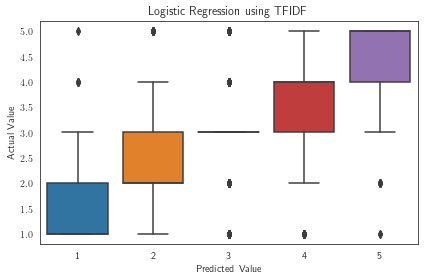

In [42]:
sns.boxplot(val_pred, val_labels)
plt.xlabel("Predicted Value", fontsize="medium")
plt.ylabel("Actual Value", fontsize="medium")
plt.title("Logistic Regression using TFIDF")
plt.tight_layout()
plt.savefig("visualization/lin_reg_scatter TFIDF.png", bbox_inches="tight", dpi=400)

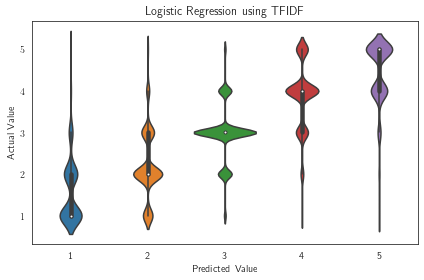

In [43]:
sns.violinplot(val_pred, val_labels)
plt.xlabel("Predicted Value", fontsize="medium")
plt.ylabel("Actual Value", fontsize="medium")
plt.title("Logistic Regression using TFIDF")
plt.tight_layout()
plt.savefig("visualization/lin_reg_violin_TFIDF.png", bbox_inches="tight", dpi=400)